In [28]:
import os
import glob

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

In [4]:
pulsar_name = '0531+21'
files = sorted(glob.glob('results_by_08.05.2019/gp_plot_txt/*' + pulsar_name + '*.csv'))

In [9]:
def read_head(filename, rows):
    with open(filename, 'r') as file:
        header = {}
        for i in range(rows):
            a, *b = file.readline().split()
            try:
                header[a] = b[0] + '.' + b[1]
            except IndexError:
                header[a] = b[0].replace(',', '.')
    return header

In [15]:
file = files[0]
head = read_head(file, 3)

In [12]:
profile = np.genfromtxt(file, skip_header=6)

In [13]:
profile[0]

14.554

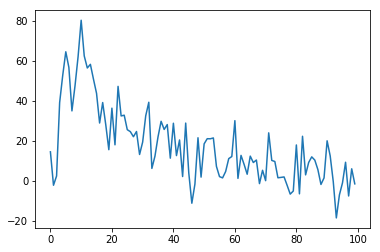

In [14]:
plt.close()
plt.plot(profile)
plt.show()

In [24]:
fs = round(1/(float(head['tay'])*0.001), 0)  # частотота дискретизации временного ряда

In [25]:
f, Pxx_den = signal.periodogram(profile, fs)

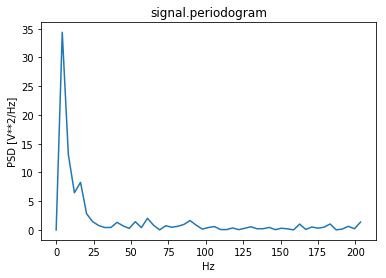

In [26]:
plt.plot(f, Pxx_den)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
# plt.xlim(0.8, 0.87)
plt.show()

Directory doesn't exist


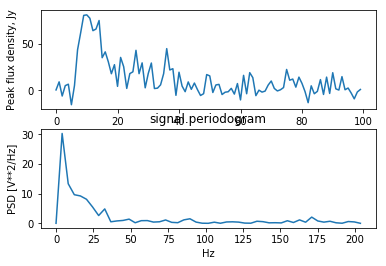

In [32]:
try:
    os.rmdir('./spectre_pulse_' + pulsar_name)
except FileNotFoundError:
    print('Directory doesn\'t exist')
os.mkdir('./spectre_pulse_' + pulsar_name)
for file in files:
    head = read_head(file, 3)
    profile = np.genfromtxt(file, skip_header=6)
    
    fs = round(1/(float(head['tay'])*0.001), 0)  # частотота дискретизации временного ряда
    f, Pxx_den = signal.periodogram(profile, fs)
    
    plt.close()
    plt.subplot(211)
    plt.xlabel('Number of point, dt = ' + head['tay'])
    plt.ylabel('Peak flux density, Jy')
    plt.plot(profile)
    plt.subplot(212)
    plt.plot(f, Pxx_den)
    plt.title('signal.periodogram')
    plt.ylabel('PSD [V**2/Hz]')
    plt.xlabel('Hz')
    
    plt.savefig('./spectre_pulse_'
                + pulsar_name
                + os.sep
                + os.path.basename(file)[:-4]
                + '.png', format='png')

In [31]:
file

'results_by_08.05.2019/gp_plot_txt\\01.01.2012_plot_0531+21_1.csv'